# Mobile Device Usage and User Behavior Analysis

## Dataset Overview
This analysis examines mobile device usage patterns across **700 users** using a comprehensive dataset that captures real-world smartphone behavior. The dataset includes demographic information (age, gender), device specifications (model, operating system), and detailed usage metrics such as daily screen time, app usage duration, battery consumption, and data usage patterns.

## Key Analysis Areas
- **Usage Patterns**: How screen time and app usage vary across different demographic groups
- **Behavioral Segmentation**: Understanding the characteristics that define light, moderate, and heavy device users
- **Technology & Society**: Identifying concerning usage patterns and their implications for digital wellness
- **Platform Comparison**: Examining differences between iOS and Android user behaviors
- **Device Preferences**: Analyzing how device choice reflects user behavior patterns

This analysis provides valuable insights for understanding modern digital consumption habits and their societal implications.

#### Load the libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

#### Load the data

In [96]:
# Load the dataset
df= pd.read_csv('user_behavior_dataset.csv')
print(f" Dataset shape: {df. shape[0]} rows × {df. shape[1]} columns")

 Dataset shape: 700 rows × 11 columns


## Data Analysis

#### Show the first 5 rows

In [99]:
# Display first few rows
df.columns = df.columns.str.strip()
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


#### Data type summary

In [101]:
# Check data types
print(f"Data types summary:")
print(df.dtypes.value_counts())

Data types summary:
int64      7
object     3
float64    1
Name: count, dtype: int64


#### Identify which columns have missing values

In [103]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values check:")
if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Found {missing_values.sum()} missing values")
    print(missing_values[missing_values > 0])

Missing values check:
No missing values found!


## Data Visualizaton

### 1. How does screen time vary by age group and gender?

<Figure size 1000x600 with 0 Axes>

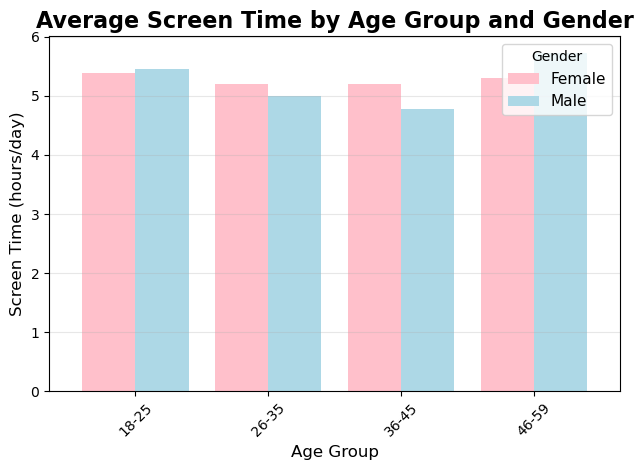

Gender       Female      Male
Age_Group                    
18-25      5.391071  5.462667
26-35      5.197872  4.998780
36-45      5.196203  4.781395
46-59      5.297196  5.721488


In [147]:

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[17, 25, 35, 45, 59], 
                        labels=['18-25', '26-35', '36-45', '46-59'])

# Calculate average screen time by age group and gender
screen_by_age_gender = df.groupby(['Age_Group', 'Gender'])['Screen On Time (hours/day)'].mean().unstack()

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
screen_by_age_gender.plot(kind='bar', width=0.8, color=['pink', 'lightblue'])
plt.title('Average Screen Time by Age Group and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Screen Time (hours/day)', fontsize=12)
plt.legend(title='Gender', fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Show summary statistics
print(screen_by_age_gender)


### 2. What's the relationship between app usage time and battery drain?

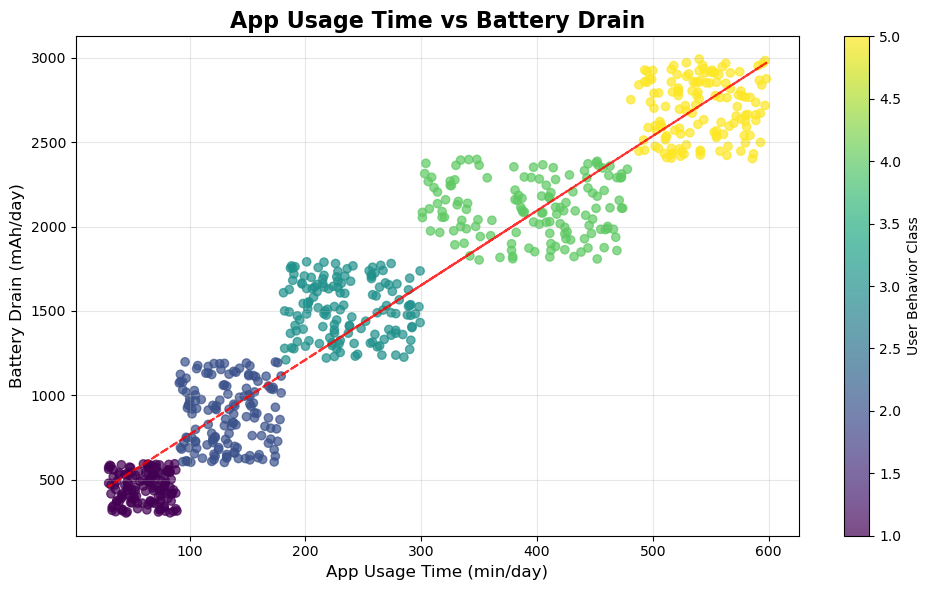

In [151]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['App Usage Time (min/day)'], 
                     df['Battery Drain (mAh/day)'], 
                     c=df['User Behavior Class'], 
                     cmap='viridis', 
                     alpha=0.7)

# Add regression line
z = np.polyfit(df['App Usage Time (min/day)'], df['Battery Drain (mAh/day)'], 1)
p = np.poly1d(z)
plt.plot(df['App Usage Time (min/day)'], p(df['App Usage Time (min/day)']), "r--", alpha=0.8)

plt.colorbar(scatter, label='User Behavior Class')
plt.title('App Usage Time vs Battery Drain', fontsize=16, fontweight='bold')
plt.xlabel('App Usage Time (min/day)', fontsize=12)
plt.ylabel('Battery Drain (mAh/day)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### 3. Do iOS users behave differently than Android users?

<Figure size 1200x600 with 0 Axes>

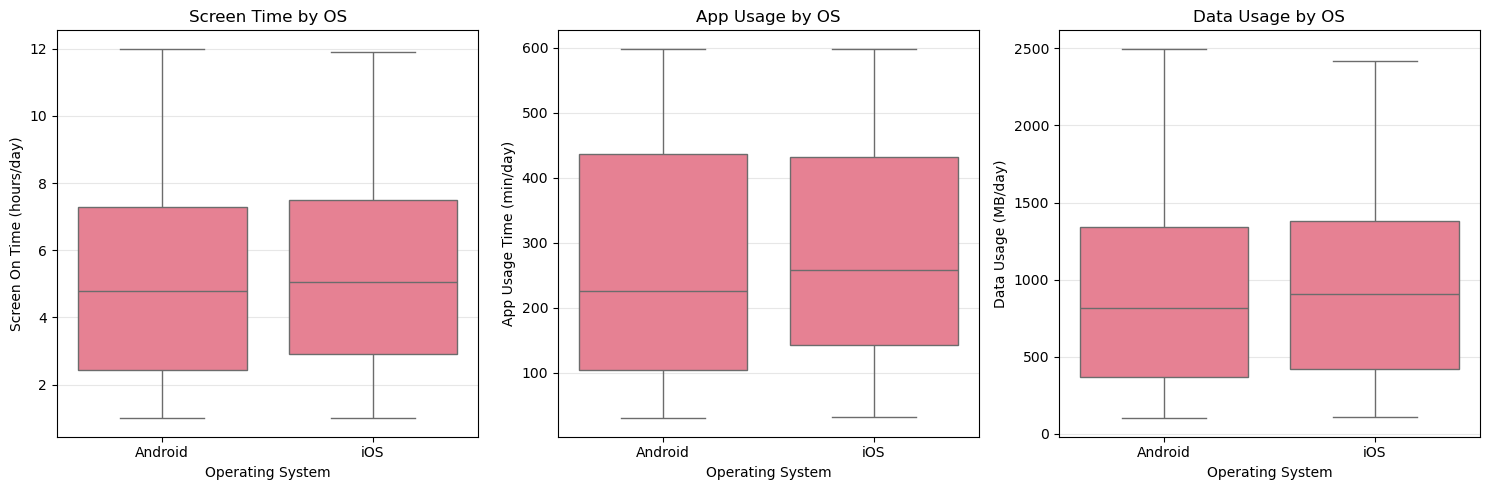

Screen Time by OS:
                  count      mean       std  min    25%   50%  75%   max
Operating System                                                        
Android           554.0  5.231047  3.096491  1.0  2.425  4.80  7.3  12.0
iOS               146.0  5.430822  2.965330  1.0  2.900  5.05  7.5  11.9


In [153]:
plt.figure(figsize=(12, 6))

# Create subplots for multiple comparisons
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Screen Time comparison
sns.boxplot(data=df, x='Operating System', y='Screen On Time (hours/day)', ax=axes[0])
axes[0].set_title('Screen Time by OS')
axes[0].grid(axis='y', alpha=0.3)

# App Usage comparison
sns.boxplot(data=df, x='Operating System', y='App Usage Time (min/day)', ax=axes[1])
axes[1].set_title('App Usage by OS')
axes[1].grid(axis='y', alpha=0.3)

# Data Usage comparison
sns.boxplot(data=df, x='Operating System', y='Data Usage (MB/day)', ax=axes[2])
axes[2].set_title('Data Usage by OS')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("Screen Time by OS:")
print(df.groupby('Operating System')['Screen On Time (hours/day)'].describe())

### 4. Which device models have the heaviest users?

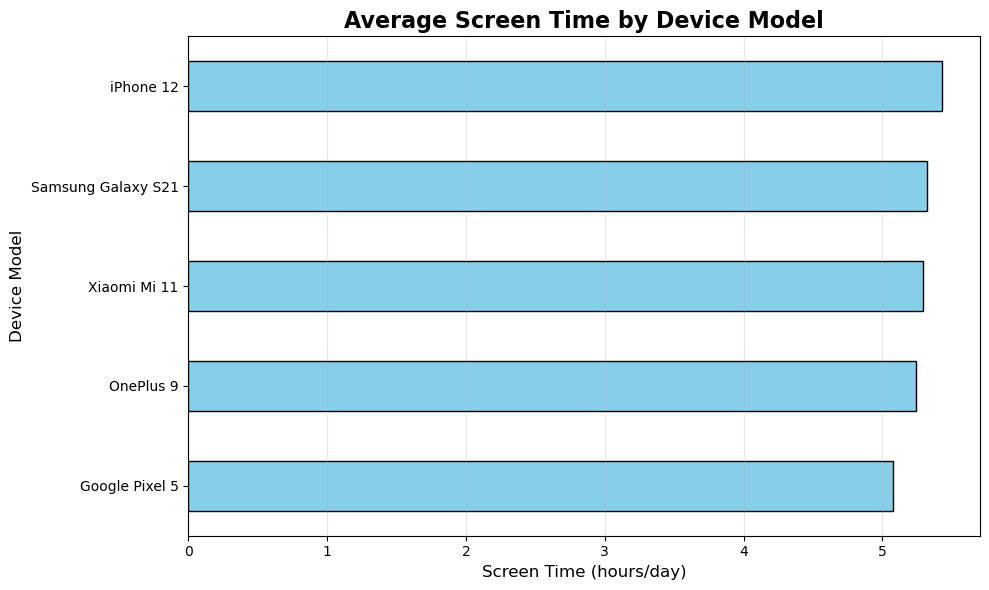

Device usage ranking:
Device Model
iPhone 12             5.430822
Samsung Galaxy S21    5.318045
Xiaomi Mi 11          5.293151
OnePlus 9             5.241353
Google Pixel 5        5.076056
Name: Screen On Time (hours/day), dtype: float64


In [155]:
# Calculate average screen time by device
device_usage = df.groupby('Device Model')['Screen On Time (hours/day)'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
device_usage.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Screen Time by Device Model', fontsize=16, fontweight='bold')
plt.xlabel('Screen Time (hours/day)', fontsize=12)
plt.ylabel('Device Model', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Device usage ranking:")
print(device_usage.sort_values(ascending=False))


### 5. What characteristics define each user behavior class?

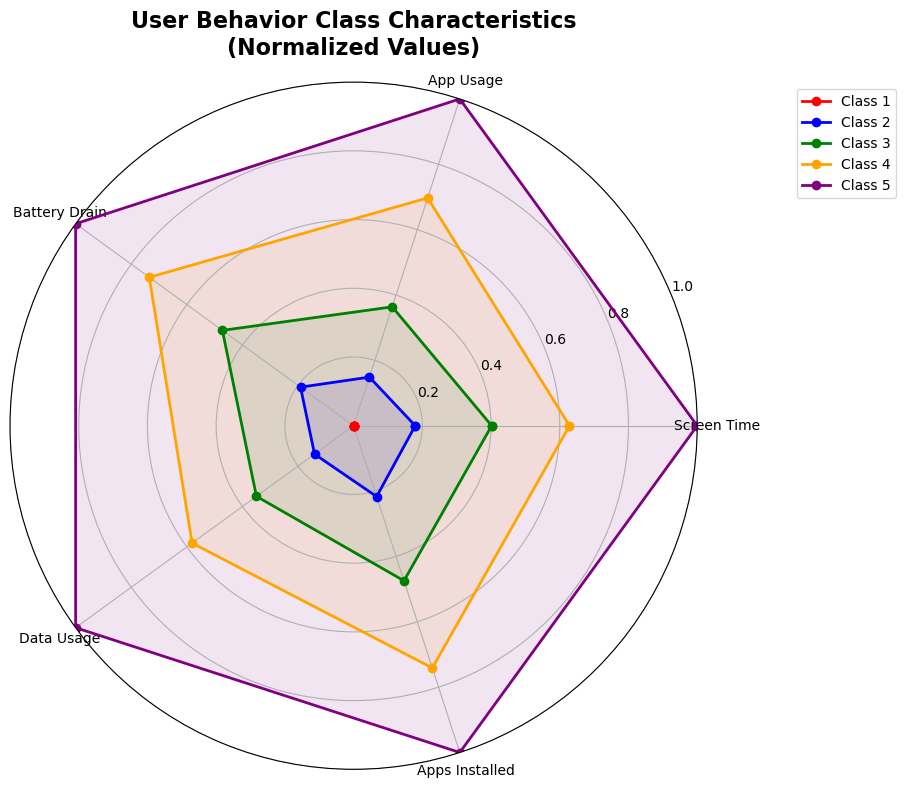

Raw averages by behavior class:
                     Screen On Time (hours/day)  App Usage Time (min/day)  \
User Behavior Class                                                         
1                                      1.490441                 60.426471   
2                                      3.037671                131.972603   
3                                      4.955944                235.398601   
4                                      6.909353                395.748201   
5                                     10.114706                541.419118   

                     Battery Drain (mAh/day)  Data Usage (MB/day)  \
User Behavior Class                                                 
1                                 454.977941           202.323529   
2                                 883.808219           451.417808   
3                                1515.055944           822.013986   
4                                2105.805755          1232.230216   
5             

In [161]:
# Calculate average values for each behavior class
behavior_chars = df.groupby('User Behavior Class')[
    ['Screen On Time (hours/day)', 'App Usage Time (min/day)', 
     'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Number of Apps Installed']
].mean()

# Normalize the data for radar chart (0-1 scale)
behavior_chars_norm = (behavior_chars - behavior_chars.min()) / (behavior_chars.max() - behavior_chars.min())

# Create radar chart
categories = ['Screen Time', 'App Usage', 'Battery Drain', 'Data Usage', 'Apps Installed']
N = len(categories)

# Create angles for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Plot each behavior class
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, behavior_class in enumerate([1, 2, 3, 4, 5]):
    values = behavior_chars_norm.loc[behavior_class].values.tolist()
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Class {behavior_class}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title('User Behavior Class Characteristics\n(Normalized Values)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Raw averages by behavior class:")
print(behavior_chars)

### 6. Are there concerning usage patterns indicating digital addiction?

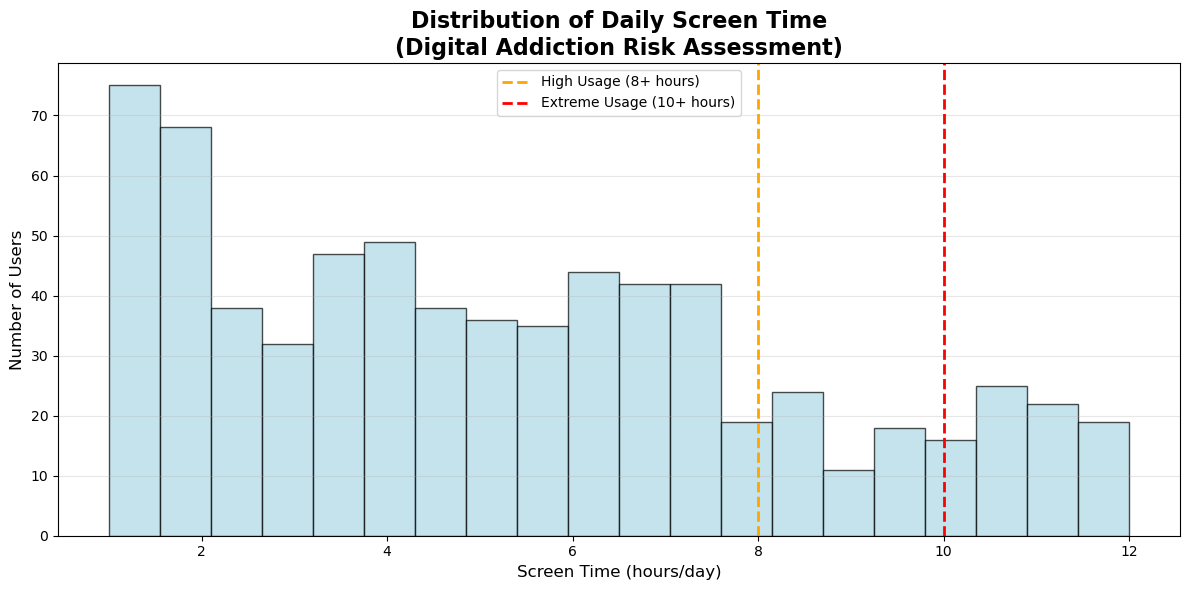

High usage users (8+ hours): 136 (19.4%)
Extreme usage users (10+ hours): 79 (11.3%)


In [129]:
plt.figure(figsize=(12, 6))

# Create histogram
plt.hist(df['Screen On Time (hours/day)'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')

# Add threshold lines for concerning usage
plt.axvline(x=8, color='orange', linestyle='--', linewidth=2, label='High Usage (8+ hours)')
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Extreme Usage (10+ hours)')

plt.title('Distribution of Daily Screen Time\n(Digital Addiction Risk Assessment)', fontsize=16, fontweight='bold')
plt.xlabel('Screen Time (hours/day)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate statistics
high_usage = df[df['Screen On Time (hours/day)'] >= 8].shape[0]
extreme_usage = df[df['Screen On Time (hours/day)'] >= 10].shape[0]
total_users = df.shape[0]

print(f"High usage users (8+ hours): {high_usage} ({high_usage/total_users*100:.1f}%)")
print(f"Extreme usage users (10+ hours): {extreme_usage} ({extreme_usage/total_users*100:.1f}%)")

### 7. How do data consumption patterns differ across user types?

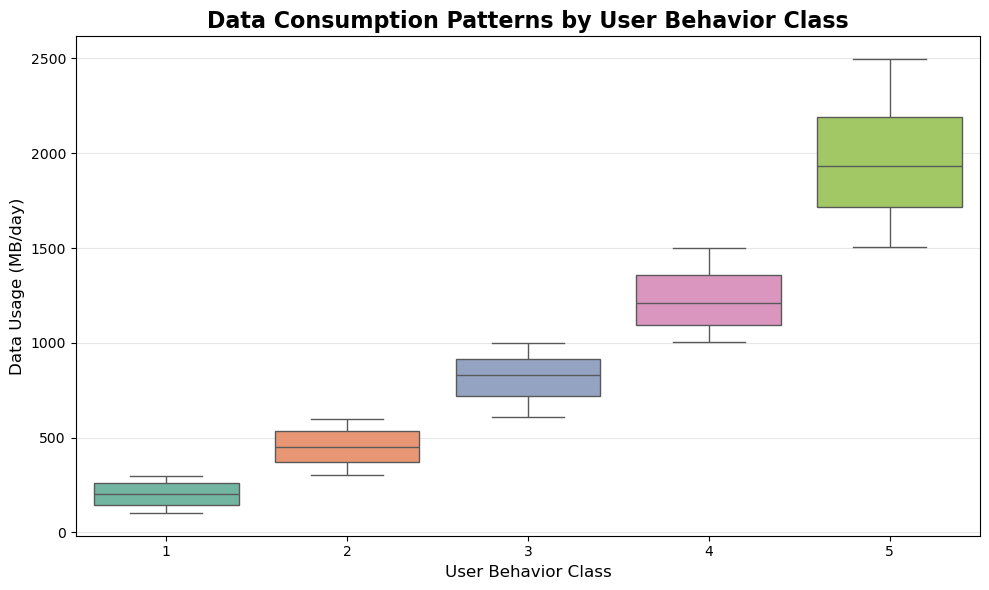

Data usage by behavior class:
                     count         mean         std     min      25%     50%  \
User Behavior Class                                                            
1                    136.0   202.323529   61.419129   102.0   146.00   202.0   
2                    146.0   451.417808   90.600507   301.0   370.25   450.0   
3                    143.0   822.013986  114.221121   608.0   720.50   828.0   
4                    139.0  1232.230216  146.192266  1002.0  1096.00  1209.0   
5                    136.0  1974.772059  297.455106  1508.0  1715.00  1935.0   

                        75%     max  
User Behavior Class                  
1                     262.5   299.0  
2                     533.5   599.0  
3                     915.5   997.0  
4                    1359.5  1499.0  
5                    2192.5  2497.0  


In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='User Behavior Class', y='Data Usage (MB/day)', palette='Set2')
plt.title('Data Consumption Patterns by User Behavior Class', fontsize=16, fontweight='bold')
plt.xlabel('User Behavior Class', fontsize=12)
plt.ylabel('Data Usage (MB/day)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print("Data usage by behavior class:")
print(df.groupby('User Behavior Class')['Data Usage (MB/day)'].describe())

### 8. What's the relationship between age and multiple usage metrics?

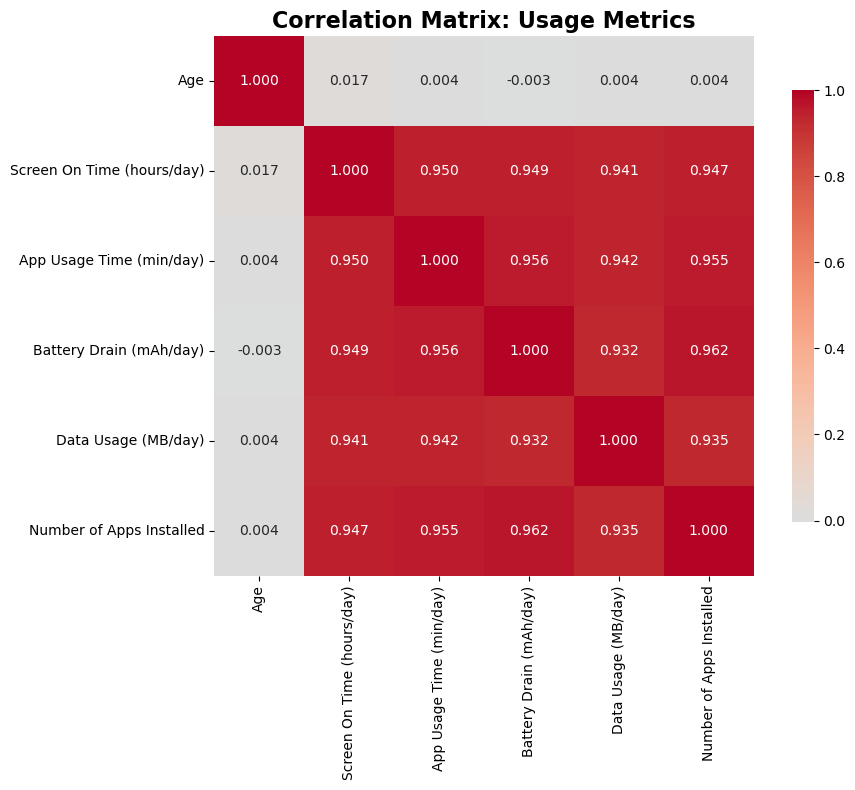

Correlation matrix:
                                 Age  Screen On Time (hours/day)  \
Age                         1.000000                    0.017232   
Screen On Time (hours/day)  0.017232                    1.000000   
App Usage Time (min/day)    0.004382                    0.950333   
Battery Drain (mAh/day)    -0.002722                    0.948983   
Data Usage (MB/day)         0.003999                    0.941322   
Number of Apps Installed    0.004034                    0.946975   

                            App Usage Time (min/day)  Battery Drain (mAh/day)  \
Age                                         0.004382                -0.002722   
Screen On Time (hours/day)                  0.950333                 0.948983   
App Usage Time (min/day)                    1.000000                 0.956385   
Battery Drain (mAh/day)                     0.956385                 1.000000   
Data Usage (MB/day)                         0.942308                 0.932276   
Number of Apps In

In [137]:
# Select numeric columns for correlation
correlation_vars = ['Age', 'Screen On Time (hours/day)', 'App Usage Time (min/day)', 
                   'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Number of Apps Installed']

correlation_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: Usage Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

### 9. How does device choice reflect user behavior preferences?

<Figure size 1200x600 with 0 Axes>

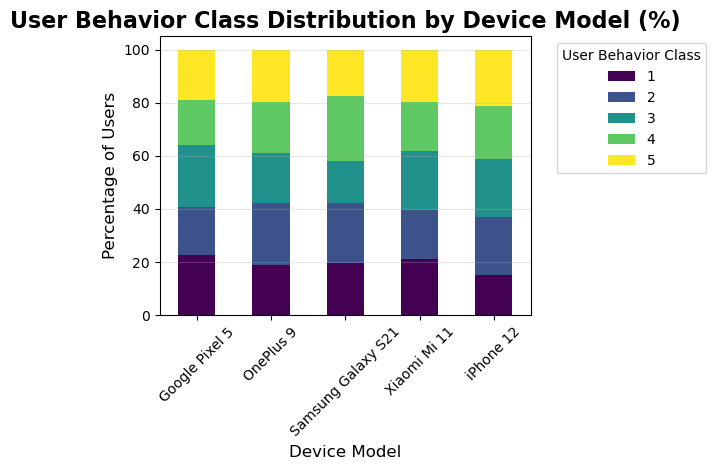

Behavior class distribution by device (%):
User Behavior Class          1          2          3          4          5
Device Model                                                              
Google Pixel 5       22.535211  18.309859  23.239437  16.901408  19.014085
OnePlus 9            18.796992  23.308271  18.796992  19.548872  19.548872
Samsung Galaxy S21   19.548872  22.556391  15.789474  24.812030  17.293233
Xiaomi Mi 11         21.232877  18.493151  21.917808  18.493151  19.863014
iPhone 12            15.068493  21.917808  21.917808  19.863014  21.232877


In [140]:
# Create cross-tabulation
device_behavior = pd.crosstab(df['Device Model'], df['User Behavior Class'], normalize='index') * 100

plt.figure(figsize=(12, 6))
device_behavior.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('User Behavior Class Distribution by Device Model (%)', fontsize=16, fontweight='bold')
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Percentage of Users', fontsize=12)
plt.legend(title='User Behavior Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Behavior class distribution by device (%):")
print(device_behavior)

### 10. Which age groups show extreme usage patterns?

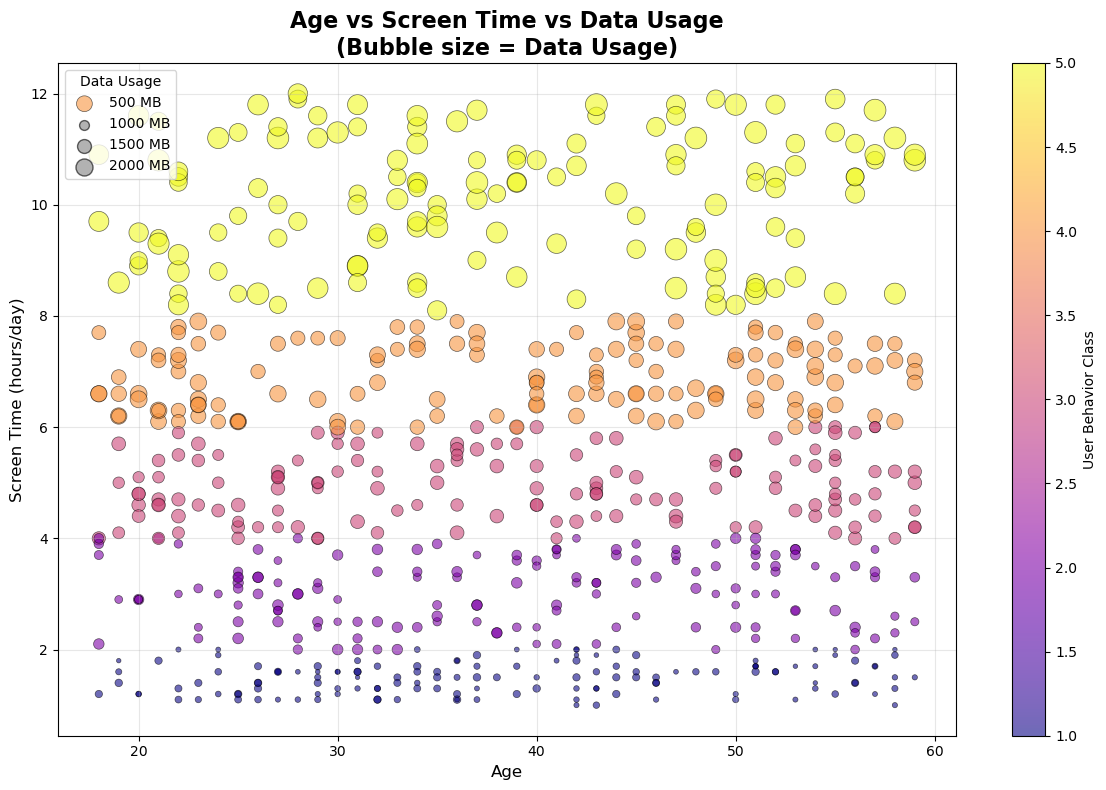


Users with extreme screen time (9+ hours): 106
Age distribution of extreme users:
count    106.000000
mean      38.339623
std       11.628280
min       18.000000
25%       29.000000
50%       37.000000
75%       48.000000
max       59.000000
Name: Age, dtype: float64


In [143]:
plt.figure(figsize=(12, 8))

# Create bubble chart
scatter = plt.scatter(df['Age'], 
                     df['Screen On Time (hours/day)'], 
                     s=df['Data Usage (MB/day)']/10,  # Size represents data usage
                     c=df['User Behavior Class'], 
                     cmap='plasma', 
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

plt.colorbar(scatter, label='User Behavior Class')
plt.title('Age vs Screen Time vs Data Usage\n(Bubble size = Data Usage)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Screen Time (hours/day)', fontsize=12)
plt.grid(alpha=0.3)

# Add legend for bubble size
sizes = [500, 1000, 1500, 2000]
labels = ['500 MB', '1000 MB', '1500 MB', '2000 MB']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size/10, c='gray', alpha=0.6, edgecolors='black')
plt.legend(labels, title='Data Usage', loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

# Identify extreme usage patterns
extreme_users = df[df['Screen On Time (hours/day)'] >= 9]
print(f"\nUsers with extreme screen time (9+ hours): {len(extreme_users)}")
print("Age distribution of extreme users:")
print(extreme_users['Age'].describe())

In [145]:
print(f"Total users analyzed: {len(df)}")
print(f"Age range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"Average screen time: {df['Screen On Time (hours/day)'].mean():.1f} hours/day")
print(f"Average app usage: {df['App Usage Time (min/day)'].mean():.0f} minutes/day")
print(f"Device distribution:")
print(df['Device Model'].value_counts())
print(f"\nOperating system distribution:")
print(df['Operating System'].value_counts())
print(f"\nUser behavior class distribution:")
print(df['User Behavior Class'].value_counts().sort_index())

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

Total users analyzed: 700
Age range: 18 - 59 years
Average screen time: 5.3 hours/day
Average app usage: 271 minutes/day
Device distribution:
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Operating system distribution:
Operating System
Android    554
iOS        146
Name: count, dtype: int64

User behavior class distribution:
User Behavior Class
1    136
2    146
3    143
4    139
5    136
Name: count, dtype: int64

ANALYSIS COMPLETE!
